In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import tensorflow as tf
import numpy as np
import IPython

In [5]:
image_feature_description = {
    'image_width':tf.io.FixedLenFeature([],tf.int64),
    'image_height':tf.io.FixedLenFeature([],tf.int64),
    'image_depth':tf.io.FixedLenFeature([],tf.int64),
    'label':tf.io.FixedLenFeature([],tf.int64),
    'image':tf.io.FixedLenFeature([],tf.string)
}

def parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

In [6]:
Training_Set = 'Training_Set.tfrecord'
Evaluation_Set = 'Evaluation_Set.tfrecord'

raw_image_dataset = tf.data.TFRecordDataset(Training_Set)
train_dataset = raw_image_dataset.map(parse_image_function)

raw_image_dataset = tf.data.TFRecordDataset(Evaluation_Set)
eval_dataset = raw_image_dataset.map(parse_image_function)

tf.Tensor(5, shape=(), dtype=int64)
213 * 320


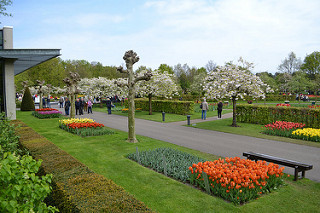

tf.Tensor(1, shape=(), dtype=int64)
333 * 500


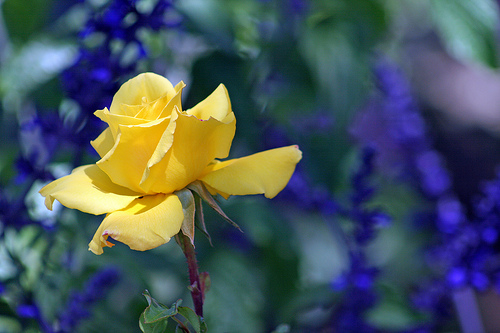

tf.Tensor(2, shape=(), dtype=int64)
240 * 320


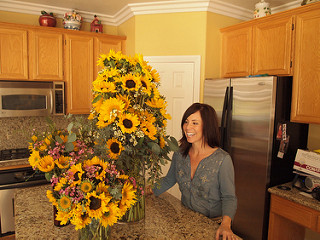

In [11]:
for image_features in train_dataset.take(3):
  image = image_features['image'].numpy()
  label = image_features['label']
  image_width = image_features['image_width']
  image_height = image_features['image_height']
  print(label)
  print('{} * {}'.format(image_width,image_height))
  IPython.display.display(IPython.display.Image(data=image))

In [8]:
print(train_dataset.__len__)

<bound method DatasetV2.__len__ of <MapDataset shapes: {image: (), image_depth: (), image_height: (), image_width: (), label: ()}, types: {image: tf.string, image_depth: tf.int64, image_height: tf.int64, image_width: tf.int64, label: tf.int64}>>
